# Problem Statement:
The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

In [406]:
#Importing Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [407]:
#Loading data
#Loading Datasets
data=pd.read_csv('winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [408]:
#Display Shape
data.shape

(1599, 12)

In [409]:
#Checking for null values
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [410]:
#Description of dataset
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [411]:
#checking data types of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [412]:
#Checking if there are any duplicates
data.drop_duplicates(inplace=True)
data.shape

(1359, 12)

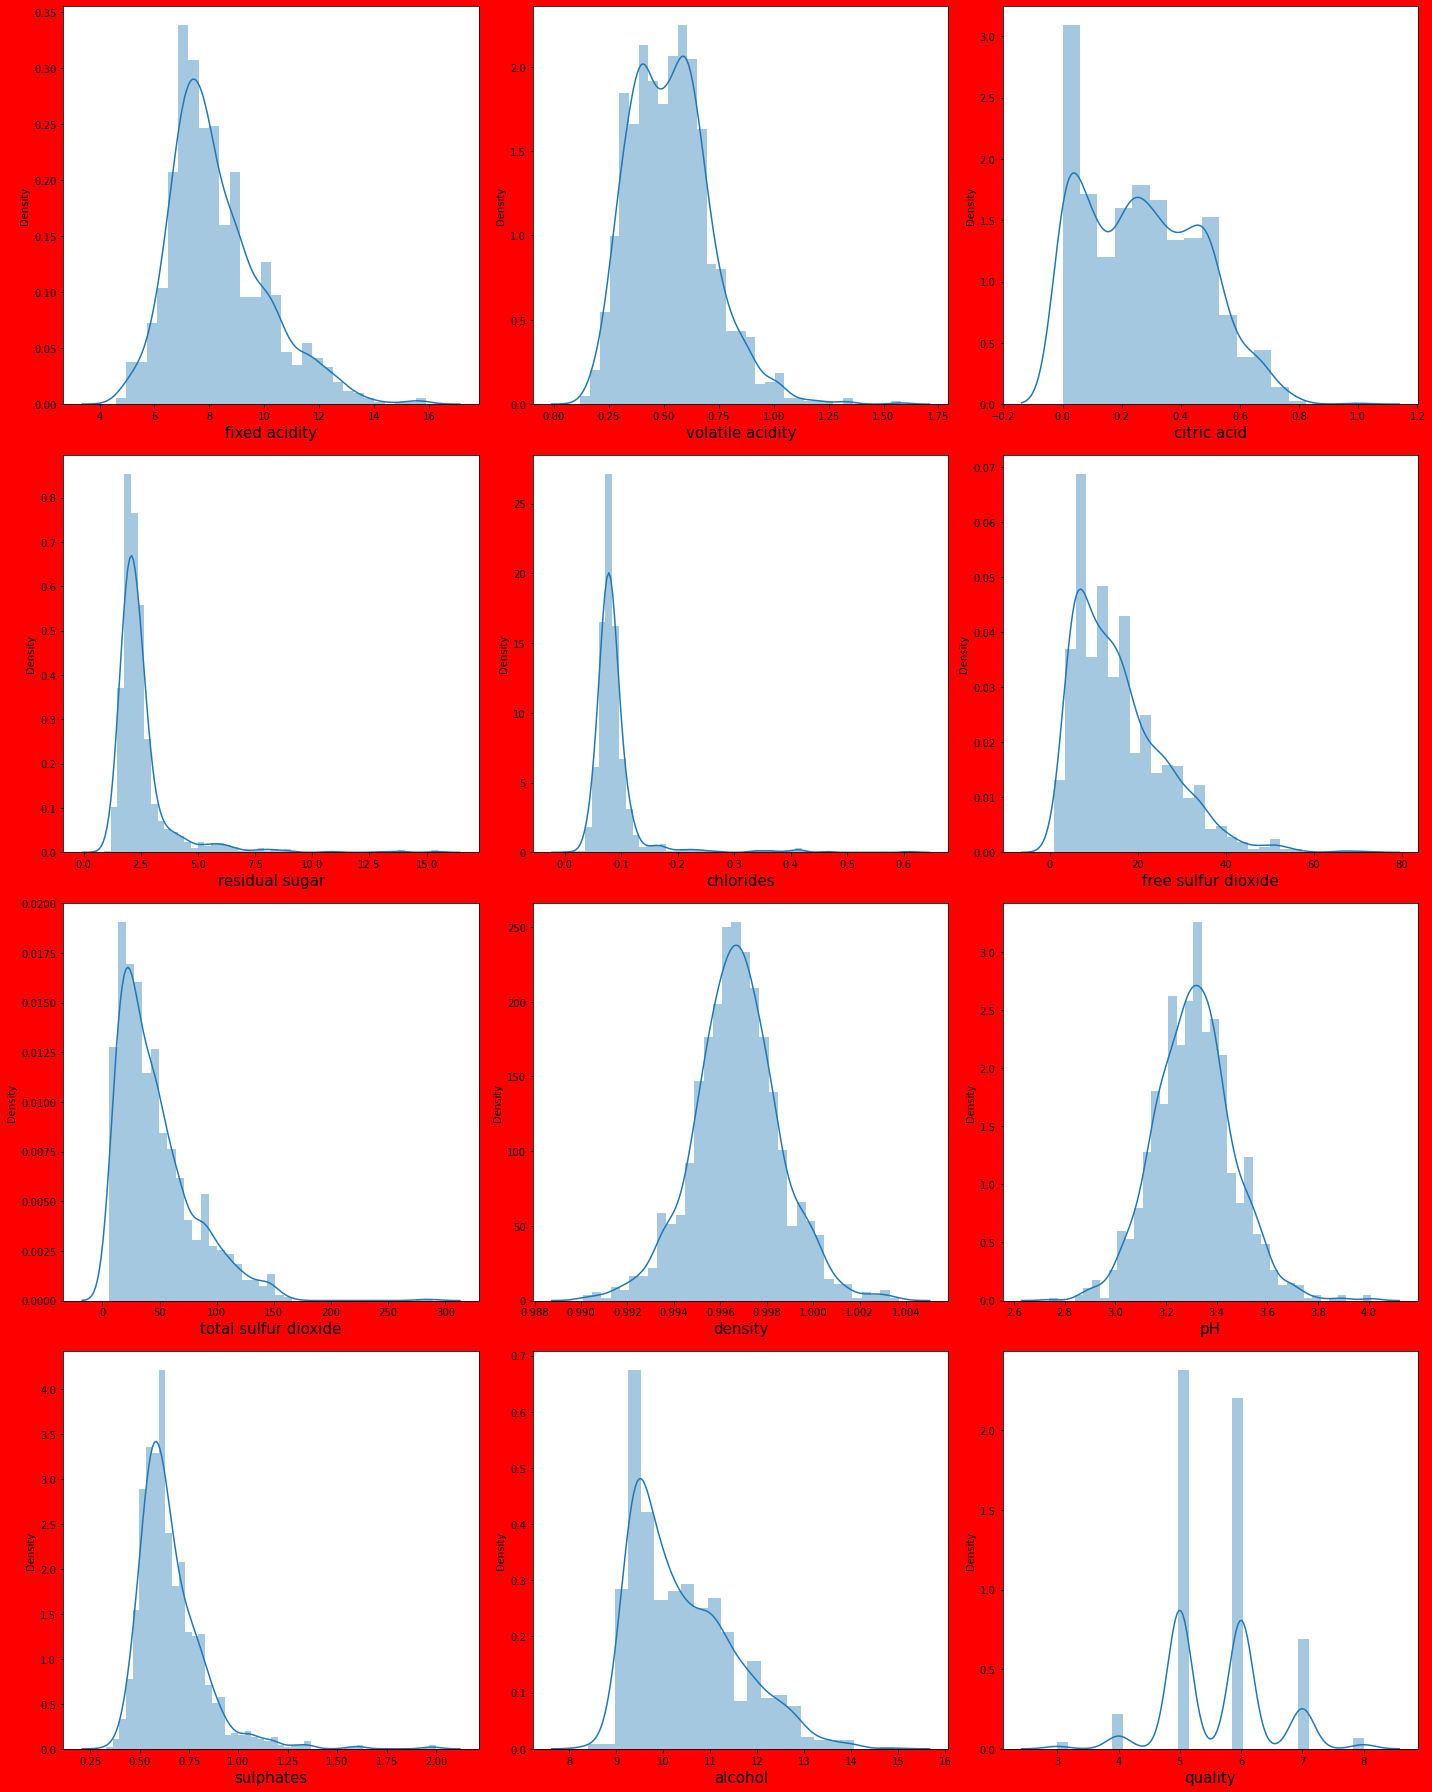

In [413]:
#Visualizing the Data
#Checking how data is distributed for every column
plt.figure(figsize=(20,25),facecolor='red')
plotnumber=1
for column in data:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

#    By looking at the graphs we can see that  it has skeewness and there are some outliers present

In [414]:
features=data.drop(['quality'],axis=1)

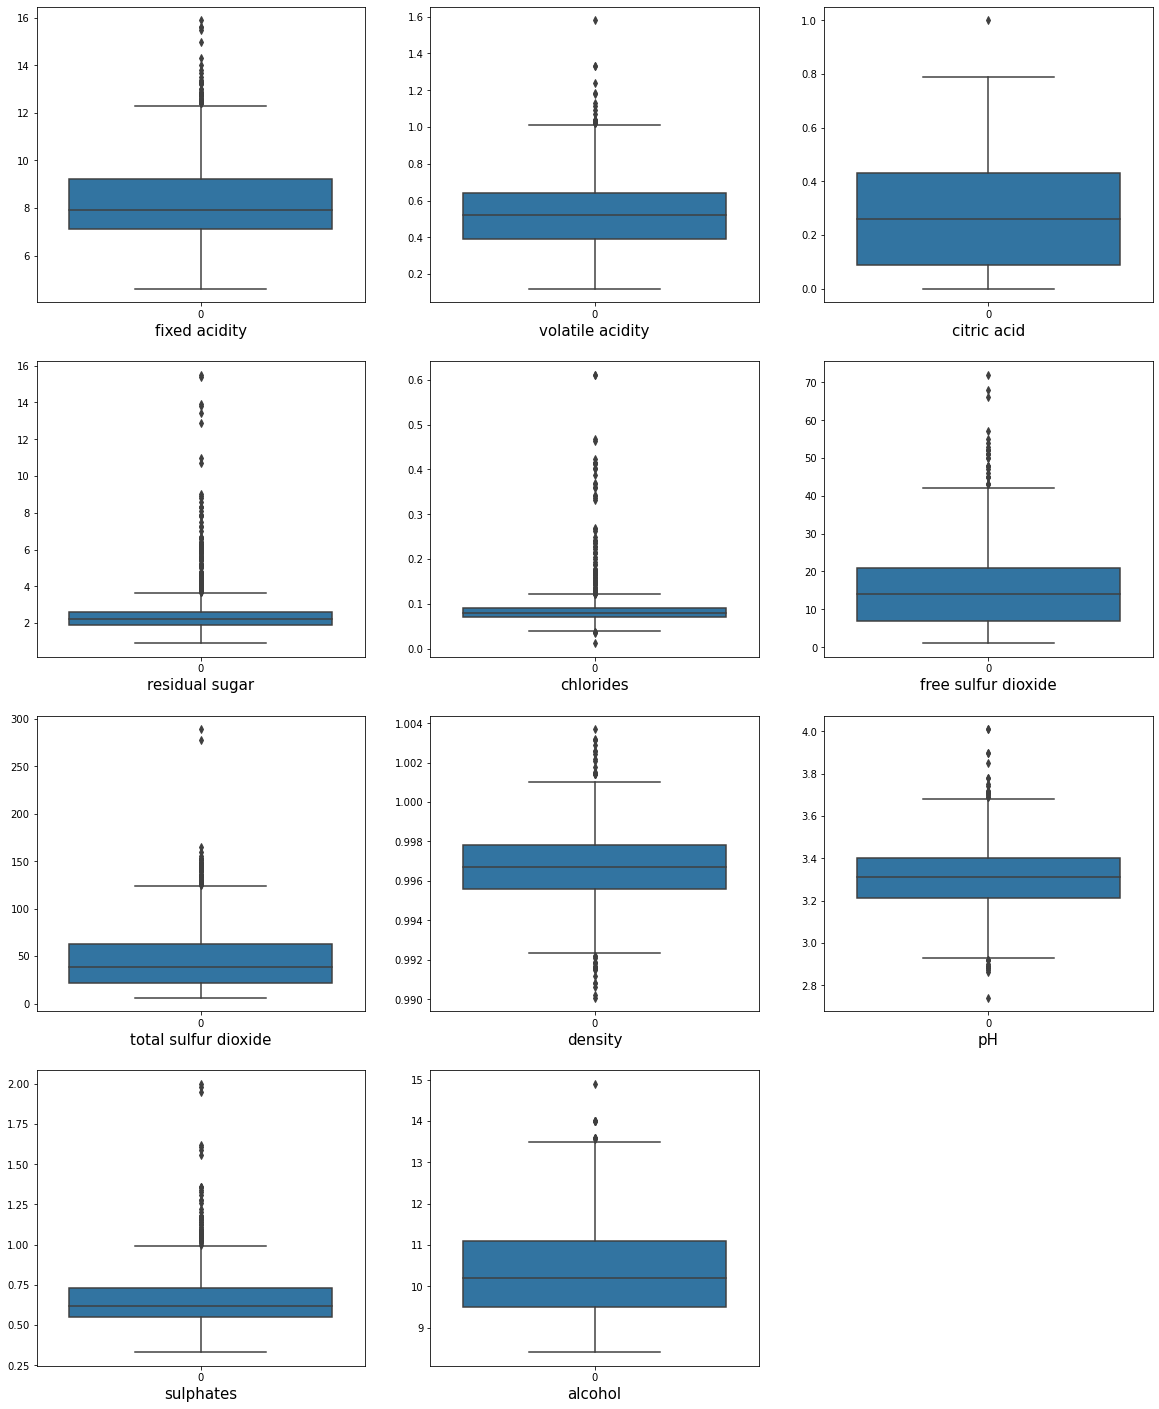

In [415]:
#Plotting Box plot to visualize the outliers
plt.figure(figsize=(20,25))
graph=1
for column in features:
    if graph<=12:
        ax=plt.subplot(4,3,graph)
        sns.boxplot(data=features[column])
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

# As we can see each feature has a outliers so by using z-score method removing outliers

In [416]:
#Importing necessary libraries
from scipy.stats import zscore

In [417]:
z_score=zscore(data[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']])

In [418]:
abs_z_score=np.abs(z_score)

In [419]:
filtering_entry=(abs_z_score<3).all(axis=1)

In [420]:
data=data[filtering_entry]

In [421]:
#checking rows and columns
data.shape

(1239, 12)

# So by looking at the shape of the data we can see that the outliers have been removed

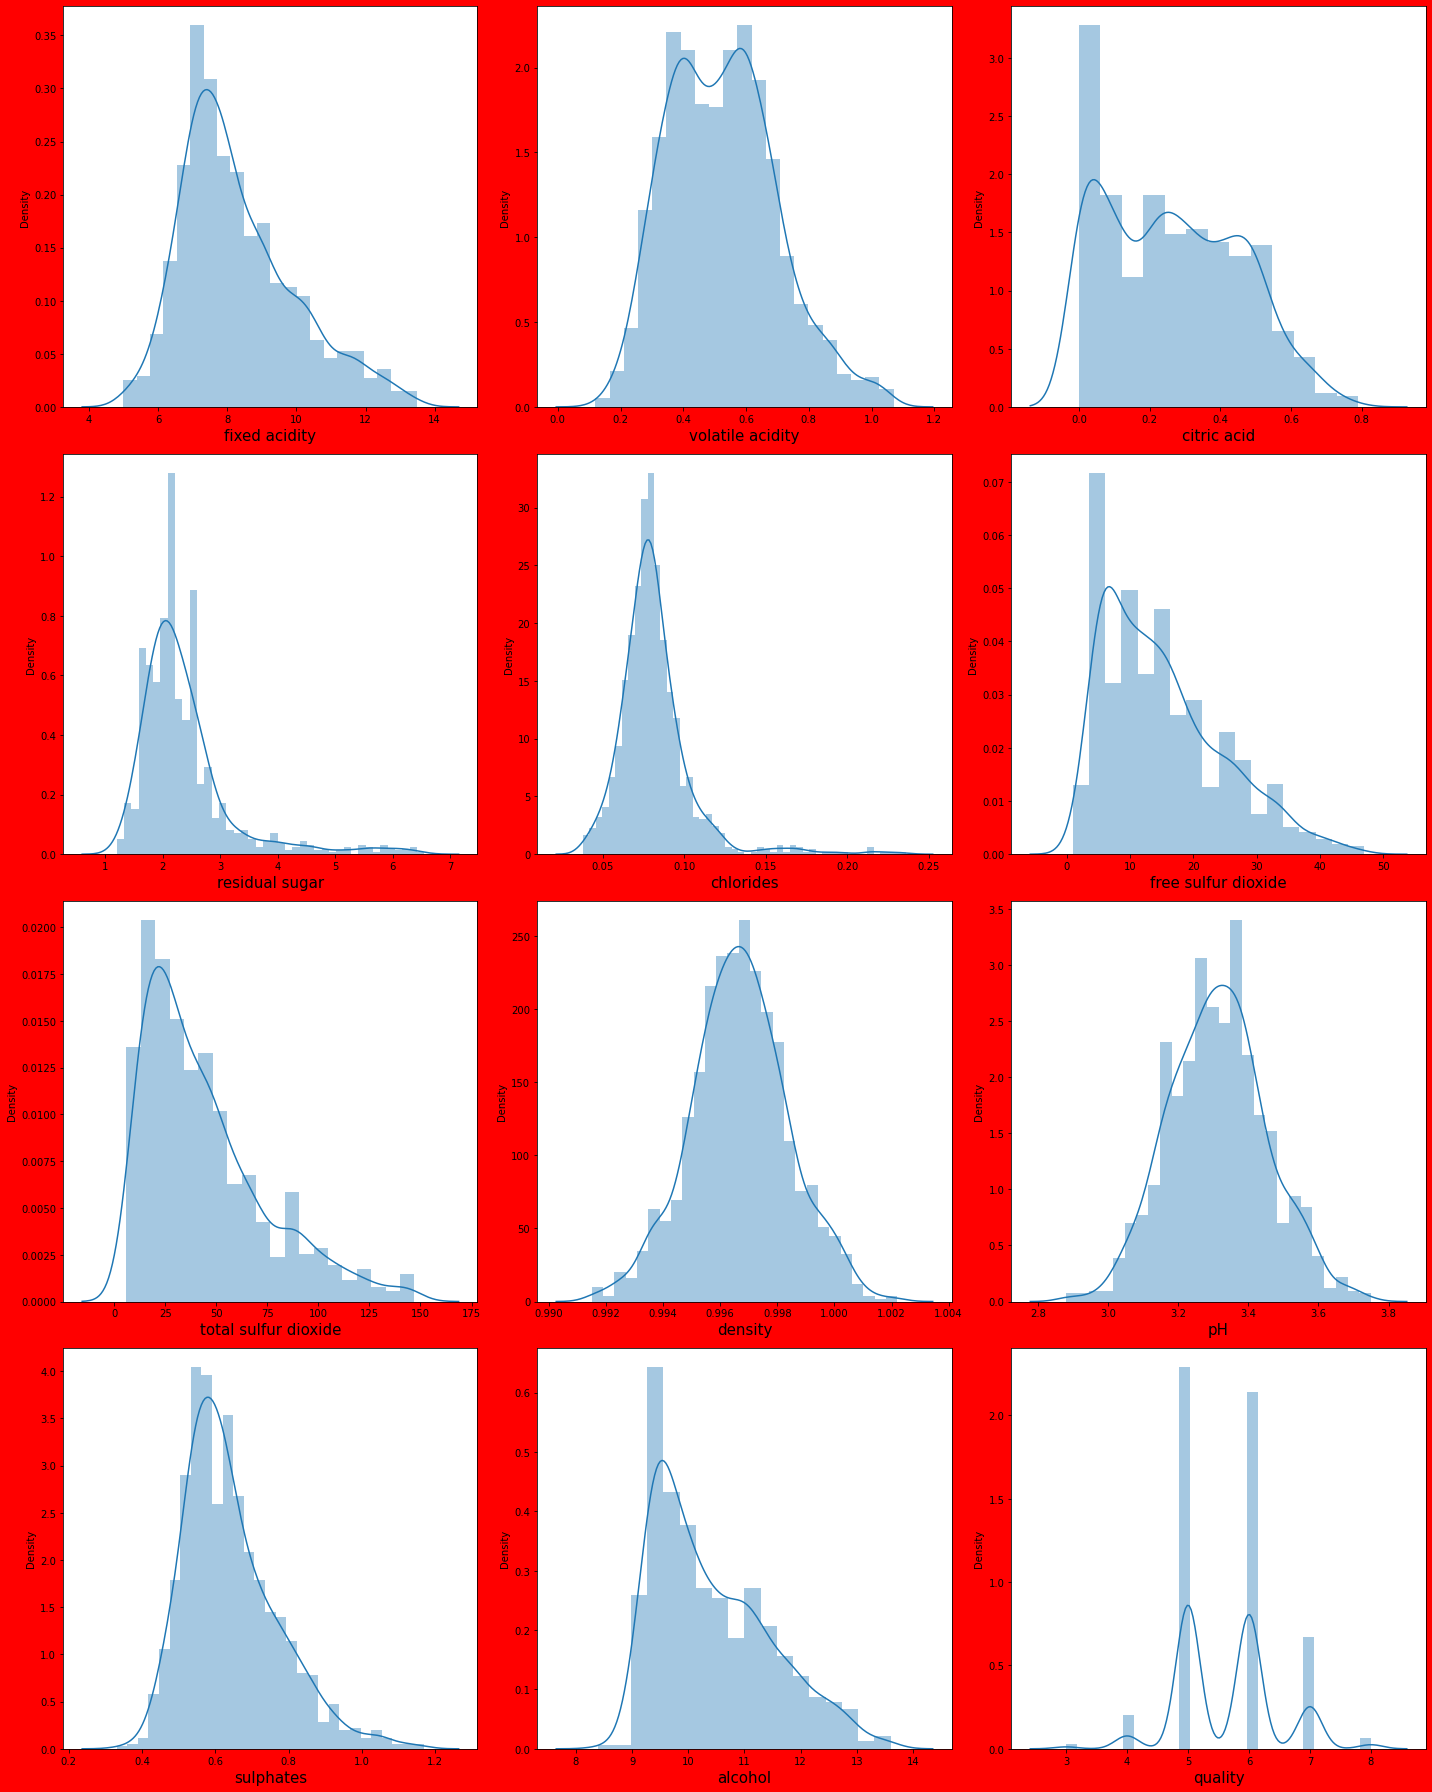

In [422]:
# Plotting distribution plot to check there if there is any skewness or the data is normally distributed or not
plt.figure(figsize=(20,25),facecolor='red')
plotnumber=1
for column in data:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

# It seems like the data is normally distributed

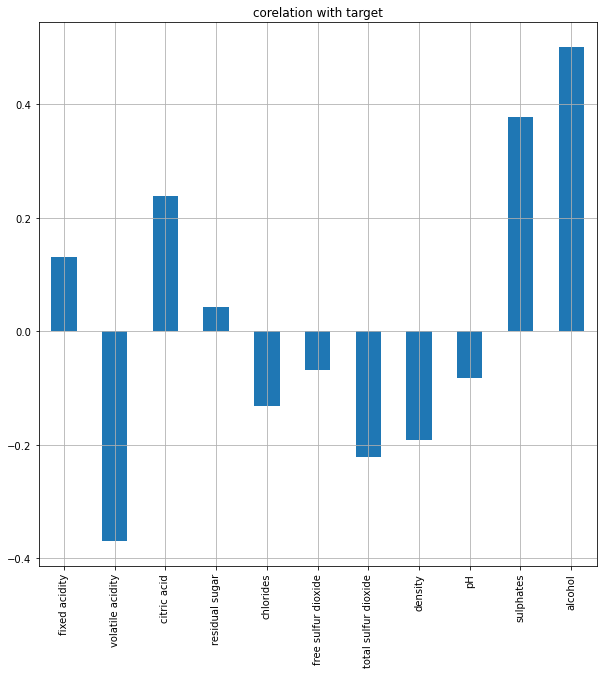

In [423]:
#checking the corelation with the target
data.drop(['quality'],axis=1).corrwith(data['quality']).plot(kind='bar',grid=True,figsize=(10,10),title='corelation with target')
plt.show()

In [424]:
#Plotting Heatmap
corr=data.corr()

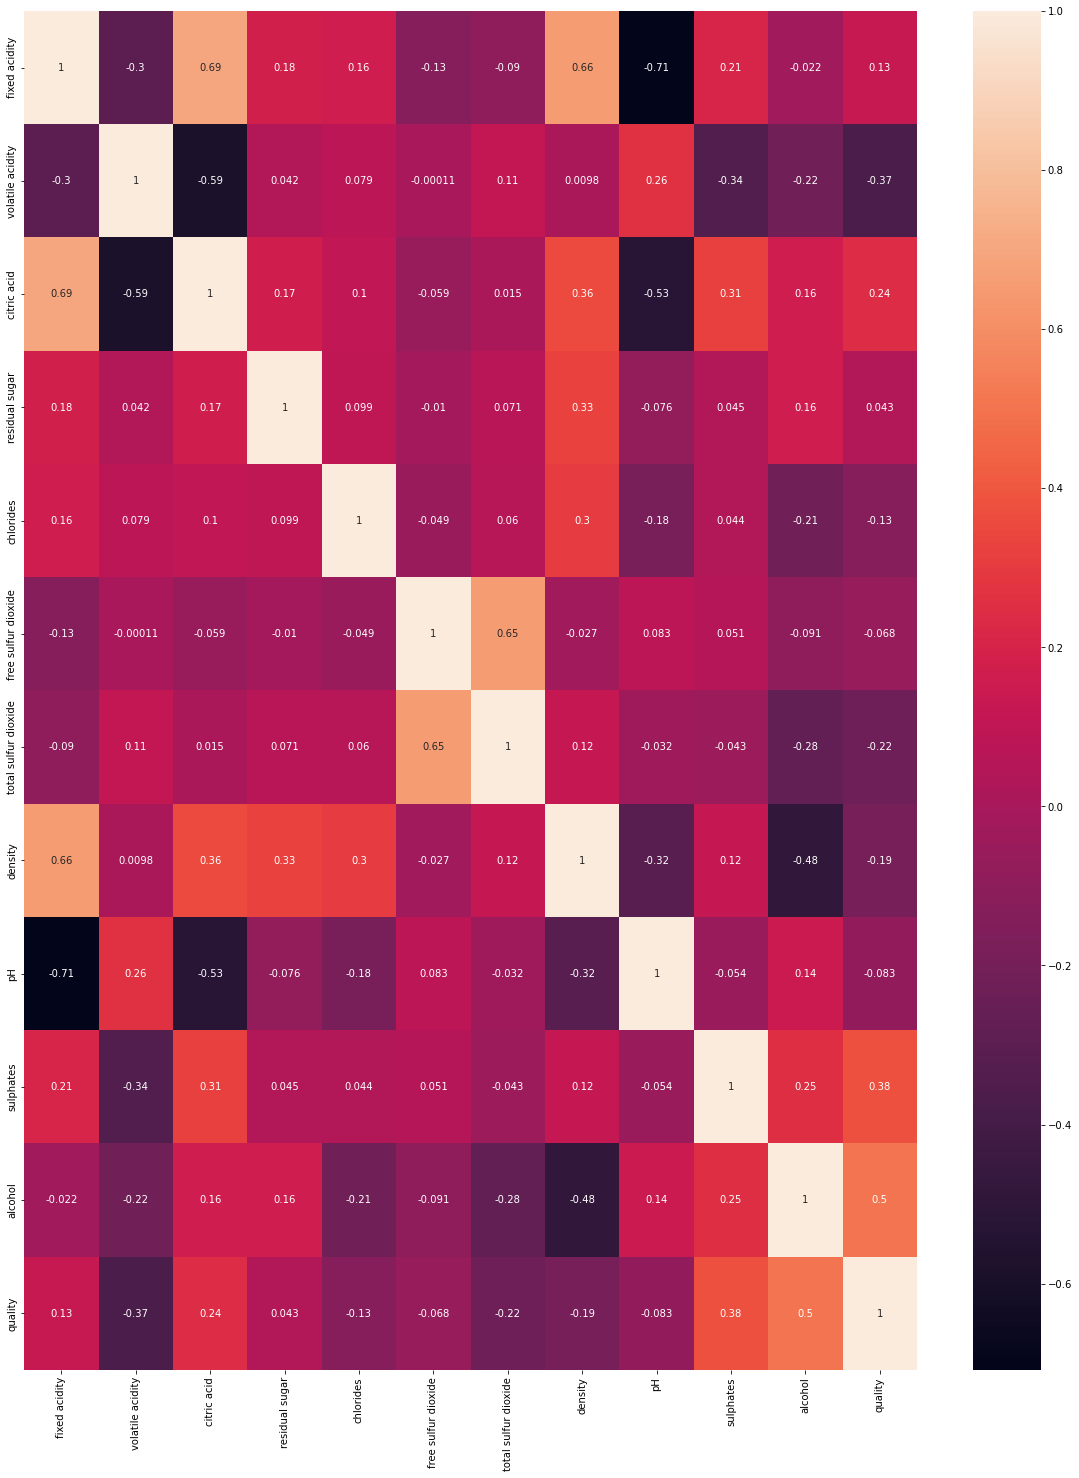

In [425]:
plt.figure(figsize=(20,25))
sns.heatmap(corr,annot=True,annot_kws={'size':10})
plt.show()

In [426]:
#Dividing dataset into features and label
#Features
x=data.drop(['quality'],axis=1)
#Label
y=data['quality']

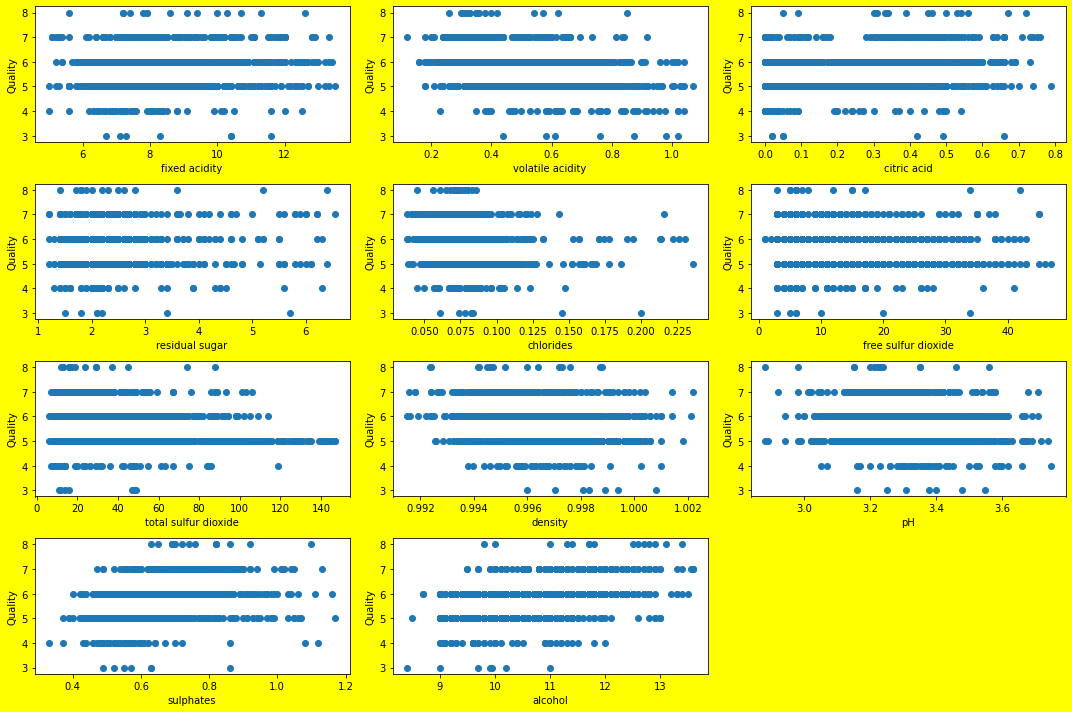

In [427]:
#Visualizing the relationship between the features and label
plt.figure(figsize=(15,10),facecolor='yellow')
plotnumber=1
for column in x:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=10)
        plt.ylabel('Quality',fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [428]:
#Using Feature Selection Method
#Importing important libraries
from sklearn.feature_selection import SelectPercentile,chi2

In [429]:
spercentile=SelectPercentile(score_func=chi2,percentile=80)
spercentile=spercentile.fit(x,y)
cols=spercentile.get_support(indices=True)
print('Feature Index:',cols)
features=x.columns[cols]
print('Features:',features)
df=pd.DataFrame({
    'features':x.columns,
    'chi2score':spercentile.scores_,
    'pvalue':spercentile.pvalues_
})
df.sort_values(by='chi2score',ascending=False)

Feature Index: [ 0  1  2  3  5  6  9 10]
Features: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'free sulfur dioxide', 'total sulfur dioxide', 'sulphates', 'alcohol'],
      dtype='object')


,features,chi2score,pvalue
6,total sulfur dioxide,2501.701016,0.000000e+00
5,free sulfur dioxide,120.613733,2.326651e-24
10,alcohol,37.026643,5.916271e-07
2,citric acid,10.764205,5.626082e-02
1,volatile acidity,9.977317,7.588051e-02
0,fixed acidity,8.772484,1.184904e-01
9,sulphates,4.989090,4.172131e-01
3,residual sugar,4.775912,4.438358e-01
4,chlorides,0.188479,9.992329e-01
8,pH,0.120428,9.997435e-01


# In this we can see that chi2 score is less fro chlorides,pH and density, so they are removed

In [430]:
#Making new dataset for features
new_x=data[['fixed acidity','volatile acidity','citric acid','residual sugar','free sulfur dioxide','total sulfur dioxide','sulphates','alcohol']]
new_x

,fixed acidity,volatile acidity,citric acid,residual sugar,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol
0,7.4,0.700,0.00,1.9,11.0,34.0,0.56,9.4
1,7.8,0.880,0.00,2.6,25.0,67.0,0.68,9.8
2,7.8,0.760,0.04,2.3,15.0,54.0,0.65,9.8
3,11.2,0.280,0.56,1.9,17.0,60.0,0.58,9.8
5,7.4,0.660,0.00,1.8,13.0,40.0,0.56,9.4
...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,28.0,38.0,0.82,9.5
1594,6.2,0.600,0.08,2.0,32.0,44.0,0.58,10.5
1595,5.9,0.550,0.10,2.2,39.0,51.0,0.76,11.2
1597,5.9,0.645,0.12,2.0,32.0,44.0,0.71,10.2


In [431]:
#Checking unique values present in label
data['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [432]:
#Since there are lot of values, so giving a category for the particular values
#values more than or equal to 7 will be considered as Good and will be replaced by value 1
#Values less 7 will be considered as not good and will be replaced by value 0
data['quality']=data['quality'].replace({5:0,6:0,7:1,4:0,8:1,3:0})
data['quality']

0       0
1       0
2       0
3       0
5       0
       ..
1593    0
1594    0
1595    0
1597    0
1598    0
Name: quality, Length: 1239, dtype: int64

In [433]:
#labels
y=data['quality']

In [434]:
y

0       0
1       0
2       0
3       0
5       0
       ..
1593    0
1594    0
1595    0
1597    0
1598    0
Name: quality, Length: 1239, dtype: int64

In [435]:
data['quality'].value_counts()

0    1070
1     169
Name: quality, dtype: int64

# data is imbalanced

In [436]:
#importing libraries
from sklearn.preprocessing import StandardScaler

In [437]:
#using standardization methid to standardize the data
scaler=StandardScaler()
x_scaler=scaler.fit_transform(new_x)
x_scaler

array([[-0.54932748,  1.00946413, -1.39286239, ..., -0.34199388,
        -0.63162401, -0.9844286 ],
       [-0.30687784,  2.05033838, -1.39286239, ...,  0.75773901,
         0.2927766 , -0.59909064],
       [-0.30687784,  1.35642221, -1.18352119, ...,  0.3245109 ,
         0.06167645, -0.59909064],
       ...,
       [-1.45851362,  0.14206893, -0.86950939, ...,  0.22453519,
         0.90904367,  0.74959223],
       [-1.45851362,  0.69141922, -0.76483879, ..., -0.00874149,
         0.52387675, -0.21375268],
       [-1.39790121, -1.2457634 ,  1.06689668, ..., -0.07539197,
         0.13870983,  0.55692324]])

In [438]:
#Importing Libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [439]:
#Initiating Decision Tree Classifier
dt=DecisionTreeClassifier() 

In [440]:
x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,test_size=0.25,random_state=46)

In [441]:
y_train.value_counts()

0    793
1    136
Name: quality, dtype: int64

# since the data is imbalanced so using over sampling method-SMOTE

In [442]:
from imblearn.over_sampling import SMOTE

In [443]:
over_samp=SMOTE(0.75)

In [444]:
x_train_ns,y_train_ns=over_samp.fit_resample(x_train,y_train)

In [445]:
print('The number of classes before fit {}'.format(y_train.value_counts()))

The number of classes before fit 0    793
1    136
Name: quality, dtype: int64


In [446]:
print('The number of classes after fit {}'.format(y_train_ns.value_counts()))

The number of classes after fit 0    793
1    594
Name: quality, dtype: int64


In [447]:
#using range fucntion to find the best random state
for i in range(0,200):
    x_train_ns,x_test,y_train_ns,y_test=train_test_split(x_scaler,y,test_size=0.25,random_state=i)
    dt.fit(x_train,y_train)
    pred=dt.predict(x_train)
    y_pred=dt.predict(x_test)
    print(f'at random state{i},the training accuracy is:-{accuracy_score(y_train,pred)}')
    print(f'at random state{i},the testing accuracy is:-{accuracy_score(y_test,y_pred)}')

at random state0,the training accuracy is:-1.0
at random state0,the testing accuracy is:-0.9838709677419355
at random state1,the training accuracy is:-1.0
at random state1,the testing accuracy is:-0.9580645161290322
at random state2,the training accuracy is:-1.0
at random state2,the testing accuracy is:-0.967741935483871
at random state3,the training accuracy is:-1.0
at random state3,the testing accuracy is:-0.9774193548387097
at random state4,the training accuracy is:-1.0
at random state4,the testing accuracy is:-0.9612903225806452
at random state5,the training accuracy is:-1.0
at random state5,the testing accuracy is:-0.9709677419354839
at random state6,the training accuracy is:-1.0
at random state6,the testing accuracy is:-0.9709677419354839
at random state7,the training accuracy is:-1.0
at random state7,the testing accuracy is:-0.9612903225806452
at random state8,the training accuracy is:-1.0
at random state8,the testing accuracy is:-0.9548387096774194
at random state9,the training

In [448]:
#Training Testing and Spliting the data
x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,test_size=0.25,random_state=46)

In [449]:
#Training the data
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [450]:
#Building Model to test unexposed data
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        pred=clf.predict(x_train)
        print('\n=====Train Score=====')
        print(f'Accuracy Score:{accuracy_score(y_train,pred)*100:.2f}%')
    elif train==False:
        y_pred=clf.predict(x_test)
        print('\n=====Test Score=====')
        print(f'Accuracy Score:{accuracy_score(y_test,y_pred)*100:.2f}%')
        print('\n Test Classification Report:\n',classification_report(y_test,y_pred,digits=2))
        

In [451]:
#calling the function and passing the dataset
metric_score(dt,x_train,x_test,y_train,y_test,train=True)#for training
metric_score(dt,x_train,x_test,y_train,y_test,train=False)#for testing


=====Train Score=====
Accuracy Score:100.00%

=====Test Score=====
Accuracy Score:86.77%

 Test Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.91      0.93       277
           1       0.40      0.48      0.44        33

    accuracy                           0.87       310
   macro avg       0.67      0.70      0.68       310
weighted avg       0.88      0.87      0.87       310



In [452]:
y_pred=dt.predict(x_test)

In [453]:
#confusion Matrix
score=confusion_matrix(y_test,y_pred)
score

array([[253,  24],
       [ 17,  16]], dtype=int64)

In [454]:
#Importing Libraries
from sklearn.model_selection import cross_val_score

In [455]:
#findig cross validation score
for j in range(2,10):
    cv_score=cross_val_score(rfc,x_scaler,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'at cross fold {j} the cv score is{cv_mean}and accuracy for the testing is {test_accuracy}')
    print('\n')

at cross fold 2 the cv score is0.8813512950127678and accuracy for the testing is 0.8741935483870967


at cross fold 3 the cv score is0.8853914447134786and accuracy for the testing is 0.8741935483870967


at cross fold 4 the cv score is0.8781449003027455and accuracy for the testing is 0.8741935483870967


at cross fold 5 the cv score is0.8805570066605719and accuracy for the testing is 0.8741935483870967


at cross fold 6 the cv score is0.8821388927973985and accuracy for the testing is 0.8741935483870967


at cross fold 7 the cv score is0.8821630347054076and accuracy for the testing is 0.8741935483870967


at cross fold 8 the cv score is0.8813521156263092and accuracy for the testing is 0.8741935483870967


at cross fold 9 the cv score is0.8829942287574786and accuracy for the testing is 0.8741935483870967




In [456]:
#Using Grid Search cv for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

In [457]:
param_grid=({
    'criterion':['gini','entropy'],
    'max_depth':[5,7,9,11,13],
    'min_samples_split':[1,3,5,7,8,9],
    'min_samples_leaf':[2,3,4,5,6,7],
    'max_leaf_nodes':[4,5,6,7,8,9]
})

In [458]:
grid_search=GridSearchCV(dt,param_grid=param_grid,n_jobs=-1)

In [459]:
#Training
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 7, 9, 11, 13],
                         'max_leaf_nodes': [4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7],
                         'min_samples_split': [1, 3, 5, 7, 8, 9]})

In [460]:
#best Parameters
grid_search.best_params_ 13 7 2 3

{'criterion': 'gini',
 'max_depth': 5,
 'max_leaf_nodes': 4,
 'min_samples_leaf': 2,
 'min_samples_split': 3}

In [463]:
#Training with the best parameters
dt=DecisionTreeClassifier(criterion='entropy',max_depth=13,max_leaf_nodes=7,min_samples_leaf=2,min_samples_split=3)
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=13, max_leaf_nodes=7,
                       min_samples_leaf=2, min_samples_split=3)

In [464]:
#calling the function and passing the dataset
metric_score(dt,x_train,x_test,y_train,y_test,train=True)#Training Score
metric_score(dt,x_train,x_test,y_train,y_test,train=False)#Testing Score


=====Train Score=====
Accuracy Score:88.91%

=====Test Score=====
Accuracy Score:88.71%

 Test Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94       277
           1       0.46      0.39      0.43        33

    accuracy                           0.89       310
   macro avg       0.70      0.67      0.68       310
weighted avg       0.88      0.89      0.88       310



In [465]:
#ROC curve
fpr,tpr,threshold=roc_curve(y_test,y_pred)

In [466]:
print('fpr',fpr)
print('tpr',tpr)
print('threshold',threshold)

fpr [0.        0.0866426 1.       ]
tpr [0.         0.48484848 1.        ]
threshold [2 1 0]


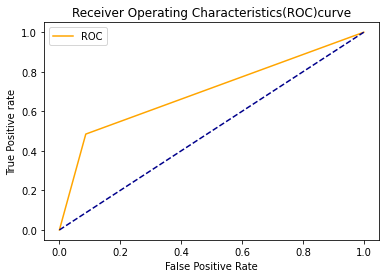

In [467]:
#Plotting ROC Curve
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.title('Receiver Operating Characteristics(ROC)curve')
plt.legend()
plt.show()

In [471]:
#Auc score
auc_score=roc_auc_score(y_test,y_pred)
auc_score=auc_score*100
auc_score

69.91029427852533